# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrRu-2019-08-30.zip
unzip autoriaNumberplateOcrRu-2019-08-30.zip
mv autoriaNumberplateOcrRu-2019-08-30 ru
```
or use your own dataset.

In [2]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "ru"

VERSION = "2020_08_26_tensorflow_v2"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [17]:
class ru(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "K", "M", "O", "P", "T", "X", "Y"]
        
        self.EPOCHS = 10

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'P', '8', 'K', '5', 'B', '1', '4', 'T', '2', '9', 'E', 'M', '6', '7', 'O', 'H', 'X', 'A', 'Y', 'C', '0', '3'}
Letters val  {'P', '8', 'K', '5', '1', 'B', '4', 'T', '2', '9', 'E', 'M', '6', '7', 'O', 'H', 'X', 'A', 'Y', 'C', '0', '3'}
Letters test  {'P', '8', 'K', '5', '1', 'B', '4', 'T', '9', '2', 'E', 'M', '6', '7', 'O', 'H', 'X', 'A', 'Y', 'C', '0', '3'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


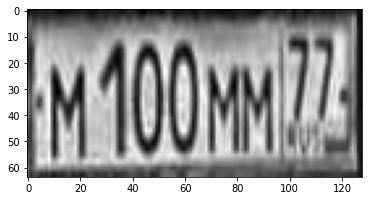

2) the_labels (plate number): M100MM77 is encoded as [16, 1, 0, 0, 16, 16, 7, 7, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED


In [18]:
ocrTextDetector = ru()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False)

In [19]:
model = ocrTextDetector.train()


START TRAINING
Model: "functional_45"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
______________________________________________________________________

In [20]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 H278HH52
True: 			 H278HH62

Predicted: 		 A979CP35
True: 			 A279CP35

Predicted: 		 M882MM17
True: 			 M882MM12

Predicted: 		 M505BK7
True: 			 M505BK37

Predicted: 		 H120HH2
True: 			 H120HH39

Predicted: 		 X193BH177
True: 			 X193BH197

Predicted: 		 A549XK111
True: 			 A549XK11

Predicted: 		 T955BB46
True: 			 T955BB45

Predicted: 		 542PK92
True: 			 Y542PK52

Predicted: 		 M658AB29
True: 			 H648AB29

Predicted: 		 E382PO46
True: 			 E282PO46

Predicted: 		 Y013YY721
True: 			 Y013YY26

Predicted: 		 M003PX46
True: 			 K003PX46

Predicted: 		 M056X29
True: 			 H056HX29

Predicted: 		 X123HK62
True: 			 Y123HK62

Predicted: 		 M226PT39
True: 			 H226PT39

Predicted: 		 O536OB68
True: 			 O536OO43

Predicted: 		 A050MM43
True: 			 K050MM43

Predicted: 		 A302TT155
True: 			 A302TT152
Test processing time: 0.6784465312957764 seconds
acc: 0.9613034623217923


In [21]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_ru_2020_08_26_tensorflow_v2.h5


In [8]:
# Train with aug

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'P', '8', 'K', '5', 'B', '1', '4', 'T', '2', '9', 'E', 'M', '6', '7', 'O', 'H', 'X', 'A', 'Y', 'C', '0', '3'}
Letters val  {'P', '8', 'K', '5', '1', 'B', '4', 'T', '2', '9', 'E', 'M', '6', '7', 'O', 'H', 'X', 'A', 'Y', 'C', '0', '3'}
Letters test  {'P', '8', 'K', '5', '1', 'B', '4', 'T', '9', '2', 'E', 'M', '6', '7', 'O', 'H', 'X', 'A', 'Y', 'C', '0', '3'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


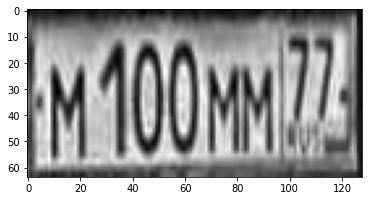

2) the_labels (plate number): M100MM77 is encoded as [16, 1, 0, 0, 16, 16, 7, 7, 23]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "functional_53"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ru (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ru[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
_______________________

In [22]:
ocrTextDetector = ru()
ocrTextDetector.EPOCHS = 5

model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

model = ocrTextDetector.train(load_last_weights=True)

In [24]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 H853HH69
True: 			 M853HH69

Predicted: 		 H278HH52
True: 			 H278HH62

Predicted: 		 X900OK51
True: 			 X900OK52

Predicted: 		 H924MB1
True: 			 H924MB11

Predicted: 		 M882MM17
True: 			 M882MM12

Predicted: 		 A426TX1633
True: 			 A426TX163

Predicted: 		 H120HH31
True: 			 H120HH39

Predicted: 		 Y013YY721
True: 			 Y013YY26

Predicted: 		 B639M116
True: 			 B639MY116
Test processing time: 0.1678466796875 seconds
acc: 0.9816700610997964


In [25]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_ru_2020_08_26_tensorflow_v2.h5
